In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\hafiz\Downloads\Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import re
import nltk
nltk.download('stopwords') #Stopwords are the English words which does not add much meaning to a sentence.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #Stemming is the process of producing morphological variants of a root/base word
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hafiz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'''
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.
'''

# Removing punctuation & symbols

In [5]:
review = dataset.Review

In [6]:
review.head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [7]:
def combine_text(list_of_text):
    combined_text = ''.join(list_of_text)
    return combined_text

The above function combine rows of sentence into one chunk or sentences.

In [8]:
review = combine_text(review)

In [9]:
review

'Wow... Loved this place.Crust is not good.Not tasty and the texture was just nasty.Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.The selection on the menu was great and so were the prices.Now I am getting angry and I want my damn pho.Honeslty it didn\'t taste THAT fresh.)The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.The fries were great too.A great touch.Service was very prompt.Would not go back.The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!I was disgusted because I was pretty sure that was human hair.I was shocked because no signs indicate cash only.Highly recommended.Waitress was a little slow in service.This place is not worth your time, let alone Vegas.did not like at all.The Burrittos Blah!The food, amazing.Service is also cute.I could care less... The interior is 

In [10]:
review = re.sub('[^a-zA-Z]',' ',review)

In [11]:
review

'Wow    Loved this place Crust is not good Not tasty and the texture was just nasty Stopped by during the late May bank holiday off Rick Steve recommendation and loved it The selection on the menu was great and so were the prices Now I am getting angry and I want my damn pho Honeslty it didn t taste THAT fresh  The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer The fries were great too A great touch Service was very prompt Would not go back The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced I tried the Cape Cod ravoli  chicken  with cranberry   mmmm I was disgusted because I was pretty sure that was human hair I was shocked because no signs indicate cash only Highly recommended Waitress was a little slow in service This place is not worth your time  let alone Vegas did not like at all The Burrittos Blah The food  amazing Service is also cute I could care less    The interior is j

In [12]:
review = review.lower()

In [13]:
review

'wow    loved this place crust is not good not tasty and the texture was just nasty stopped by during the late may bank holiday off rick steve recommendation and loved it the selection on the menu was great and so were the prices now i am getting angry and i want my damn pho honeslty it didn t taste that fresh  the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer the fries were great too a great touch service was very prompt would not go back the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced i tried the cape cod ravoli  chicken  with cranberry   mmmm i was disgusted because i was pretty sure that was human hair i was shocked because no signs indicate cash only highly recommended waitress was a little slow in service this place is not worth your time  let alone vegas did not like at all the burrittos blah the food  amazing service is also cute i could care less    the interior is j

# Stemming VS Lemmitization

In [14]:
review = review.split()

In [15]:
review

['wow',
 'loved',
 'this',
 'place',
 'crust',
 'is',
 'not',
 'good',
 'not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty',
 'stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'off',
 'rick',
 'steve',
 'recommendation',
 'and',
 'loved',
 'it',
 'the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices',
 'now',
 'i',
 'am',
 'getting',
 'angry',
 'and',
 'i',
 'want',
 'my',
 'damn',
 'pho',
 'honeslty',
 'it',
 'didn',
 't',
 'taste',
 'that',
 'fresh',
 'the',
 'potatoes',
 'were',
 'like',
 'rubber',
 'and',
 'you',
 'could',
 'tell',
 'they',
 'had',
 'been',
 'made',
 'up',
 'ahead',
 'of',
 'time',
 'being',
 'kept',
 'under',
 'a',
 'warmer',
 'the',
 'fries',
 'were',
 'great',
 'too',
 'a',
 'great',
 'touch',
 'service',
 'was',
 'very',
 'prompt',
 'would',
 'not',
 'go',
 'back',
 'the',
 'cashier',
 'had',
 'no',
 'care',
 'what',
 'so',
 'ever',
 'on',
 'what',
 'i',
 'had',
 'to'

In [16]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
ps = PorterStemmer()
review_1 = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
'''Stemming & exclude stopwords'''

'Stemming & exclude stopwords'

In [18]:
review_1

['wow',
 'love',
 'place',
 'crust',
 'good',
 'tasti',
 'textur',
 'nasti',
 'stop',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommend',
 'love',
 'select',
 'menu',
 'great',
 'price',
 'get',
 'angri',
 'want',
 'damn',
 'pho',
 'honeslti',
 'tast',
 'fresh',
 'potato',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmer',
 'fri',
 'great',
 'great',
 'touch',
 'servic',
 'prompt',
 'would',
 'go',
 'back',
 'cashier',
 'care',
 'ever',
 'say',
 'still',
 'end',
 'wayyy',
 'overpr',
 'tri',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberri',
 'mmmm',
 'disgust',
 'pretti',
 'sure',
 'human',
 'hair',
 'shock',
 'sign',
 'indic',
 'cash',
 'highli',
 'recommend',
 'waitress',
 'littl',
 'slow',
 'servic',
 'place',
 'worth',
 'time',
 'let',
 'alon',
 'vega',
 'like',
 'burritto',
 'blah',
 'food',
 'amaz',
 'servic',
 'also',
 'cute',
 'could',
 'care',
 'less',
 'interior',
 'beauti',
 'perform',
 'right',
 'red',
 'velvet',
 'c

In [19]:
'''Notes: It is weird where stemming containts "ly" at the back of the word, the word become "i" e.g "nasty" become "nasti"'''

'Notes: It is weird where stemming containts "ly" at the back of the word, the word become "i" e.g "nasty" become "nasti"'

In [20]:
a = ps.stem('tasty')

In [21]:
a

'tasti'

In [22]:
b = ps.stem('nasty')

In [23]:
b

'nasti'

To know more the non-accurate stemming above, kindly ready this article at https://www.analyticssteps.com/blogs/what-stemming-and-lemmatization-nlp

Thus, technique Lemmatization is more accurate. We will do lemmatization instead.

'''
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.
'''

In [24]:
lemmatizer = WordNetLemmatizer()
review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
'''Lemmatization & exclude stopwords'''

'Lemmatization & exclude stopwords'

In [25]:
aa = lemmatizer.lemmatize('tasty')

In [26]:
aa

'tasty'

# Corpus

In [27]:
corpus = []

In [28]:
review = ' '.join(review)
corpus.append(review)

In [29]:
corpus #corpus mean a single collection of text document

['wow loved place crust good tasty texture nasty stopped late may bank holiday rick steve recommendation loved selection menu great price getting angry want damn pho honeslty taste fresh potato like rubber could tell made ahead time kept warmer fry great great touch service prompt would go back cashier care ever say still ended wayyy overpriced tried cape cod ravoli chicken cranberry mmmm disgusted pretty sure human hair shocked sign indicate cash highly recommended waitress little slow service place worth time let alone vega like burrittos blah food amazing service also cute could care le interior beautiful performed right red velvet cake ohhh stuff good never brought salad asked hole wall great mexican street taco friendly staff took hour get food table restaurant food luke warm sever running around like totally overwhelmed worst salmon sashimi also combo like burger fry beer decent deal like final blow found place accident could happier seems like good quick place grab bite familiar

In [30]:
type(corpus)

list

# Document Term Matrix (DTM)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer(stop_words='english')

In [33]:
X = cv.fit_transform(corpus).toarray()

In [34]:
X

array([[1, 8, 1, ..., 2, 4, 5]], dtype=int64)

In [35]:
feature_names = cv.get_feature_names()

In [36]:
feature_names

['absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodation',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledged',
 'actual',
 'actually',
 'added',
 'affordable',
 'afternoon',
 'againi',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almond',
 'amazing',
 'amazingwe',
 'ambiance',
 'ambience',
 'ample',
 'andddd',
 'angry',
 'annoying',
 'anticipated',
 'anymore',
 'anytime',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appalling',
 'apparently',
 'appealing',
 'appetite',
 'appetizer',
 'apple',
 'approval',
 'area',
 'arepas',
 'aria',
 'array',
 'arrived',
 'arrives',
 'arriving',
 'article',
 'ask',
 'asked',
 'asking',
 'assure',
 'ate',
 'atmosphere',
 'atrocious',
 'attached',
 'attack',
 'attention',
 'attentive',
 'attitude',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'avoided',
 'away',
 'awesome',
 'awful',
 'awkward',
 'awkwardly',
 'ayce',
 'az',
 'baba',
 'baby',
 'bachi',
 'backw

In [37]:
dtm = pd.DataFrame(X, columns = feature_names) #dtm = Document Term Matrix

In [38]:
dtm

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledged,...,yeah,year,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,1,8,1,1,1,1,1,1,1,2,...,1,5,1,1,1,1,1,2,4,5


In [39]:
type(dtm)

pandas.core.frame.DataFrame

# Some Statistic - Top 10 words

In [40]:
dtm_t = dtm.transpose() #transpose dtm

In [41]:
dtm_t

,0
absolute,1
absolutely,8
absolutley,1
accident,1
accommodation,1
...,...
yucky,1
yukon,1
yum,2
yummy,4


In [42]:
dtm_t_clean = dtm_t.iloc[:,0]

In [43]:
dtm_t_clean #this means, our data (words) is at the index

absolute         1
absolutely       8
absolutley       1
accident         1
accommodation    1
                ..
yucky            1
yukon            1
yum              2
yummy            4
zero             5
Name: 0, Length: 1664, dtype: int64

In [44]:
type(dtm_t_clean)

pandas.core.series.Series

In [45]:
df = pd.DataFrame({'Bag_word':dtm_t_clean.index, 'count':dtm_t_clean.values}) #rename column index & other column

In [46]:
df

,Bag_word,count
0,absolute,1
1,absolutely,8
2,absolutley,1
3,accident,1
4,accommodation,1
...,...,...
1659,yucky,1
1660,yukon,1
1661,yum,2
1662,yummy,4


In [47]:
df['%'] = (df['count']/df['count'].sum())*100

In [48]:
df = df.sort_values(by = 'count', ascending = False)

In [49]:
df

,Bag_word,count,%
563,food,127,2.661916
1081,place,111,2.326556
614,good,95,1.991197
1302,service,87,1.823517
628,great,70,1.467198
...,...,...,...
701,honor,1,0.020960
698,honeslty,1,0.020960
695,holiday,1,0.020960
694,hole,1,0.020960


In [50]:
df.head(10) #top 10 frequency value

,Bag_word,count,%
563,food,127,2.661916
1081,place,111,2.326556
614,good,95,1.991197
1302,service,87,1.823517
628,great,70,1.467198
1488,time,54,1.131838
828,like,47,0.985118
1176,really,36,0.754559
118,best,30,0.628799
1214,restaurant,28,0.586879


Findings: The above top 5 words showing that postive feedback on food, service and place. The question is, do those words represent the whole review?

# Wordcloud

In [51]:
from wordcloud import WordCloud

In [52]:
wc = WordCloud (background_color='white', colormap='Dark2', max_font_size=150, random_state=42)

In [53]:
type(corpus[0])

str

In [54]:
wc = wc.generate(corpus[0]) #the input need text which need to do corpus[0] as str rather corpus which is type list

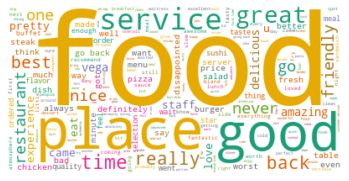

In [55]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Finding: Overall, the review show positif feedback on food, service & place. Same finding as above based on top 10 words.

# Topic Modeling - LDA

In [56]:
from gensim import matutils, models

C:\Users\hafiz\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [57]:
import scipy.sparse
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
dtm_t.head()

,0
absolute,1
absolutely,8
absolutley,1
accident,1
accommodation,1


In [59]:
#we can covert to saprse matrix if our dtm have many 0 when mapped. For our case, we not need it. But below is the code

In [60]:
sparse_counts = scipy.sparse.csr_matrix(dtm_t)
corpus_tm = matutils.Sparse2Corpus(sparse_counts) #convert to gensim dtm

In [61]:
cv

CountVectorizer(stop_words='english')

In [62]:
cv.vocabulary_.items() #this is for id2word which need location of document term matrix (dtm)

dict_items([('wow', 1646), ('loved', 854), ('place', 1081), ('crust', 333), ('good', 614), ('tasty', 1461), ('texture', 1472), ('nasty', 954), ('stopped', 1404), ('late', 803), ('bank', 92), ('holiday', 695), ('rick', 1228), ('steve', 1397), ('recommendation', 1186), ('selection', 1291), ('menu', 908), ('great', 628), ('price', 1119), ('getting', 598), ('angry', 30), ('want', 1596), ('damn', 343), ('pho', 1069), ('honeslty', 698), ('taste', 1457), ('fresh', 574), ('potato', 1109), ('like', 828), ('rubber', 1244), ('tell', 1466), ('ahead', 17), ('time', 1488), ('kept', 784), ('warmer', 1599), ('fry', 582), ('touch', 1507), ('service', 1302), ('prompt', 1133), ('cashier', 212), ('care', 203), ('say', 1273), ('ended', 468), ('wayyy', 1611), ('overpriced', 1017), ('tried', 1519), ('cape', 199), ('cod', 261), ('ravoli', 1170), ('chicken', 237), ('cranberry', 319), ('mmmm', 929), ('disgusted', 406), ('pretty', 1118), ('sure', 1441), ('human', 716), ('hair', 650), ('shocked', 1313), ('sign', 

In [63]:
id2word = dict((v,k) for k,v in cv.vocabulary_.items())

In [64]:
corpus_tm

In [65]:
ida = models.LdaModel(corpus=corpus_tm, id2word=id2word, num_topics=2, passes=5)
ida.print_topics()

[(0,
  '0.004*"food" + 0.004*"good" + 0.004*"place" + 0.003*"great" + 0.003*"service" + 0.002*"like" + 0.002*"time" + 0.002*"really" + 0.001*"best" + 0.001*"nice"'),
 (1,
  '0.023*"food" + 0.020*"place" + 0.017*"good" + 0.016*"service" + 0.012*"great" + 0.010*"time" + 0.008*"like" + 0.006*"really" + 0.005*"best" + 0.005*"restaurant"')]

In [66]:
ida = models.LdaModel(corpus=corpus_tm, id2word=id2word, num_topics=4, passes=70)
ida.print_topics()

[(0,
  '0.001*"food" + 0.001*"place" + 0.001*"service" + 0.001*"good" + 0.001*"great" + 0.001*"time" + 0.001*"like" + 0.001*"best" + 0.001*"really" + 0.001*"nice"'),
 (1,
  '0.025*"food" + 0.021*"place" + 0.018*"good" + 0.017*"service" + 0.014*"great" + 0.010*"time" + 0.009*"like" + 0.007*"really" + 0.006*"best" + 0.005*"restaurant"'),
 (2,
  '0.001*"good" + 0.001*"food" + 0.001*"place" + 0.001*"service" + 0.001*"great" + 0.001*"time" + 0.001*"really" + 0.001*"like" + 0.001*"best" + 0.001*"restaurant"'),
 (3,
  '0.001*"food" + 0.001*"place" + 0.001*"good" + 0.001*"great" + 0.001*"service" + 0.001*"time" + 0.001*"like" + 0.001*"really" + 0.001*"nice" + 0.001*"best"')]

# Topic Modeling - LDA Round 2 (Nouns & Adjectives)


Part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [67]:
from nltk import word_tokenize, pos_tag

In [68]:
#Let's see how we can show word tag for a given sentence

In [69]:
text_example = 'I love the pasta soo much'

In [70]:
token = nltk.word_tokenize(text_example) # Method 1: tag using tokenize from nltk

In [71]:
token_tag = pos_tag(token)

In [72]:
token_tag

[('I', 'PRP'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('pasta', 'NN'),
 ('soo', 'NN'),
 ('much', 'JJ')]

In [73]:
word_split = text_example.split() # Method 2: tag using split method

In [74]:
word_split

['I', 'love', 'the', 'pasta', 'soo', 'much']

In [75]:
word_tag = pos_tag(word_split)

In [76]:
word_tag #reseacher or lingustic has tag each word for better understanding complexity of the language

[('I', 'PRP'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('pasta', 'NN'),
 ('soo', 'NN'),
 ('much', 'JJ')]

In [77]:
#Lets's create function to filter only nouns & adjectives for our corpus

In [78]:
def noun_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    noun_adj = [word for (word,pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(noun_adj)

In [79]:
corpus

['wow loved place crust good tasty texture nasty stopped late may bank holiday rick steve recommendation loved selection menu great price getting angry want damn pho honeslty taste fresh potato like rubber could tell made ahead time kept warmer fry great great touch service prompt would go back cashier care ever say still ended wayyy overpriced tried cape cod ravoli chicken cranberry mmmm disgusted pretty sure human hair shocked sign indicate cash highly recommended waitress little slow service place worth time let alone vega like burrittos blah food amazing service also cute could care le interior beautiful performed right red velvet cake ohhh stuff good never brought salad asked hole wall great mexican street taco friendly staff took hour get food table restaurant food luke warm sever running around like totally overwhelmed worst salmon sashimi also combo like burger fry beer decent deal like final blow found place accident could happier seems like good quick place grab bite familiar

In [80]:
type(corpus)

list

In [81]:
df_corpus = pd.DataFrame(corpus,columns=['bag_of_words']) #convert from list to dataframe

In [82]:
df_corpus

,bag_of_words
0,wow loved place crust good tasty texture nasty...


In [83]:
corpus_noun_adj = pd.DataFrame(df_corpus.bag_of_words.apply(noun_adj))

In [84]:
corpus_noun_adj

,bag_of_words
0,wow place crust good tasty texture nasty late ...


In [85]:
cv = CountVectorizer(stop_words='english')

In [86]:
X2 = cv.fit_transform(corpus_noun_adj.bag_of_words).toarray() #corpus_noun_adj.bag_of_words = only text from dataframe(corpus_noun_adj)

In [87]:
X2

array([[1, 1, 1, ..., 2, 4, 1]], dtype=int64)

In [88]:
features_names_2 = cv.get_feature_names()

In [89]:
features_names_2

['absolute',
 'accident',
 'accommodation',
 'accomodate',
 'accountant',
 'ache',
 'actual',
 'affordable',
 'afternoon',
 'airline',
 'airport',
 'albondigas',
 'allergy',
 'almond',
 'amazing',
 'ambiance',
 'ambience',
 'ample',
 'andddd',
 'angry',
 'anticipated',
 'anytime',
 'apart',
 'apology',
 'app',
 'appetizer',
 'apple',
 'approval',
 'area',
 'arepas',
 'aria',
 'array',
 'arrives',
 'article',
 'ask',
 'asked',
 'assure',
 'ate',
 'atmosphere',
 'atrocious',
 'attack',
 'attention',
 'attentive',
 'attitude',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'awesome',
 'awful',
 'awkward',
 'ayce',
 'az',
 'baba',
 'baby',
 'bachi',
 'bacon',
 'bad',
 'bagel',
 'bakery',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 'bargain',
 'bartender',
 'baseball',
 'batch',
 'bathroom',
 'batter',
 'bay',
 'bbq',
 'bean',
 'beat',
 'beateous',
 'beautiful',
 'beauty',
 'beef',
 'beer',
 'bellagio',
 'best',
 'better',
 'betteri',
 'big',
 'bigger',


In [90]:
dtm_noun_adj = pd.DataFrame(X2, columns = features_names_2) #dtm = Document Term Matrix

In [91]:
dtm_noun_adj

,absolute,accident,accommodation,accomodate,accountant,ache,actual,affordable,afternoon,airline,...,yeah,year,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,1,1,1,1,1,1,1,1,1,1,...,1,5,1,1,1,1,1,2,4,1


In [92]:
dtm_noun_adj_t = dtm_noun_adj.transpose()

In [93]:
dtm_noun_adj_t

,0
absolute,1
accident,1
accommodation,1
accomodate,1
accountant,1
...,...
yucky,1
yukon,1
yum,2
yummy,4


In [94]:
sparse_counts = scipy.sparse.csr_matrix(dtm_noun_adj_t)
corpus_tm_noun_adj = matutils.Sparse2Corpus(sparse_counts)

In [95]:
corpus_tm_noun_adj

In [96]:
cv

CountVectorizer(stop_words='english')

In [97]:
id2word = dict((v,k) for k,v in cv.vocabulary_.items())

In [98]:

ida = models.LdaModel(corpus=corpus_tm_noun_adj, id2word=id2word, num_topics=2, passes=5)
ida.print_topics()

[(0,
  '0.030*"food" + 0.027*"place" + 0.024*"good" + 0.021*"service" + 0.017*"great" + 0.013*"time" + 0.007*"restaurant" + 0.006*"nice" + 0.006*"delicious" + 0.006*"best"'),
 (1,
  '0.013*"food" + 0.009*"place" + 0.008*"service" + 0.007*"good" + 0.006*"great" + 0.005*"time" + 0.003*"best" + 0.003*"nice" + 0.003*"vega" + 0.002*"delicious"')]

In [99]:
ida = models.LdaModel(corpus=corpus_tm_noun_adj, id2word=id2word, num_topics=1, passes=70)
ida.print_topics()

[(0,
  '0.027*"food" + 0.024*"place" + 0.020*"good" + 0.018*"service" + 0.015*"great" + 0.012*"time" + 0.006*"restaurant" + 0.005*"nice" + 0.005*"best" + 0.005*"delicious"')]

Findings: Positive review on food, place, service, time



Note: LDA is showing the most common words through entire corpus. Since our corpus (doc) is only one. We use num_topics = 1 to show most common words and its probability against our entire corpus.

# Sentiment Analysis

In [100]:
from textblob import TextBlob

In [101]:
TextBlob('The food is delicious but the price a bit expensive').sentiment #example

Sentiment(polarity=0.25, subjectivity=0.85)

In [102]:
TextBlob('The pasta is bad at the restaurant').sentiment #example

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [103]:
TextBlob('great').sentiment #example

Sentiment(polarity=0.8, subjectivity=0.75)

In [104]:
TextBlob('not great').sentiment #example

Sentiment(polarity=-0.4, subjectivity=0.75)

Polarity - ranging from negative(-1) to positive (+1) | 
Subjectivity - ranging from fact(0) to opinion(1)

In [105]:
corpus_noun_adj.bag_of_words

0    wow place crust good tasty texture nasty late ...
Name: bag_of_words, dtype: object

In [106]:
type(corpus_noun_adj.bag_of_words)

pandas.core.series.Series

In [107]:
type(corpus_noun_adj.bag_of_words[0])

str

In [108]:
TextBlob(corpus_noun_adj.bag_of_words[0]).sentiment

Sentiment(polarity=0.23144828219902547, subjectivity=0.6264937611667053)

Finding: Positive Review, Opinion